In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 8
})
import os
from icecream import ic
import re


In [3]:
with open('/home/bitdrones/ros2_ws/src/positions_video.pkl', 'rb') as f:
    data = pickle.load(f)

data.shape
n_agents = data.shape[1]
N = data.shape[2]
dt = 0.01

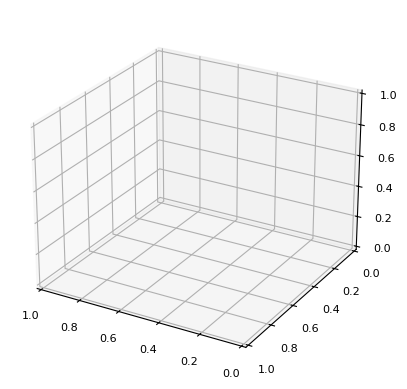

In [11]:
figures_dir = "figures_gif_video/"
os.makedirs(figures_dir, exist_ok=True)
t = np.linspace(0, N*dt, N)
colors = plt.cm.viridis(np.linspace(0, 1, n_agents))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
step = 200
step_save = 1
legends = []
for i in range(0,N,step_save):
    min = (i-step) if (i-step) > 0 else 0
    ax.plot3D(data[0,0,0:i], data[1,0,0:i], -0.6*np.ones_like(data[1,0,0:i]),color='red')
    #ax.scatter(data[0,agent,i], data[1,agent,i], 0,color=color,marker='o')
    ax.plot3D(1.6*np.ones_like(data[1,0,0:i]), data[1,0,0:i], data[2,0,0:i],color='red')
    for agent in range(n_agents):
        ax.view_init(elev=25, azim=120)
        color = colors[agent]
        ax.plot3D(data[0,agent,min:i], data[1,agent,min:i], data[2,agent,min:i],color=color,label=f"Actual trajectory agent {agent+1}")
        ax.scatter(data[0,agent,i], data[1,agent,i], data[2,agent,i],color=color,marker='o')

        #ax.scatter(data[0,agent,i], data[1,agent,i], data[2,agent,i],color=color,marker='o')

    ax.legend()#, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)
    ax.set_xlabel('X Axis (m)')
    ax.set_ylabel('Y Axis (m)')
    ax.set_zlabel('Z Axis (m)')
    ax.set_xlim(-1.2, 1.6)
    ax.set_ylim(-1.2, 1.2)
    ax.set_zlim(-0.6, 1.4)
    if i < 10:
        plt.savefig(figures_dir + f"frame_00{i}.png")
    elif i < 100:
        plt.savefig(figures_dir + f"frame_0{i}.png")
    else:
        plt.savefig(figures_dir + f"frame_{i}.png")
    ax.clear()
    #ax.plot3D(agents_r[0,agent,1:-1], agents_r[1,agent,1:-1], agents_r[2,agent,1:-1],color=color, linestyle='dashed')

    #legends.append(f"Real trajectory agent {agent+1}")

In [4]:
from PIL import Image
import os

# Path to the folder containing the frames
frames_folder = figures_dir  # Replace with your folder path
output_gif = "animation_new_controller.gif"

In [5]:
# Collect all frame file paths
frame_files = [os.path.join(frames_folder, f) for f in os.listdir(frames_folder) if f.endswith('.png')]
# Sort numerically based on the number in the filename
frame_files = sorted(frame_files, key=lambda x: int(re.search(r'\d+', x).group()))
# Open the frames


# Open the frames
frames = [Image.open(frame) for frame in frame_files]
# Save as GIF
frames[0].save(output_gif, format="GIF", append_images=frames[1:], save_all=True,duration=200, loop=0)

print(f"GIF saved as {output_gif}")


GIF saved as animation_new_controller.gif


In [12]:
import cv2
import os

# Dossier contenant les images
image_folder = "/home/bitdrones/ros2_ws/src/lie_group_swarm/figures_gif_video"
output_video = "drones_position.mp4"

# Lire toutes les images triées par nom (important pour l'ordre)
images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")])

# Déterminer la taille de l'image (en supposant qu'elles ont toutes la même taille)
first_image = cv2.imread(os.path.join(image_folder, images[0]))
height, width, _ = first_image.shape

# Définir les paramètres de la vidéo
fps = 741 / 90  # ≈ 8.23 fps
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec vidéo
video = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

# Ajouter les images à la vidéo
for image in images:
    img_path = os.path.join(image_folder, image)
    frame = cv2.imread(img_path)
    video.write(frame)

# Libérer les ressources
video.release()
cv2.destroyAllWindows()

print("✅ Vidéo créée avec succès!")

✅ Vidéo créée avec succès!


In [5]:
with open('/home/bitdrones/ros2_ws/src/diffs.pkl', 'rb') as f:
    data = pickle.load(f)

print(data.shape)
n_agents = data.shape[1]
N = data.shape[0]
dt = 0.01

figures_dir = "figures_gif_video_diff/"
os.makedirs(figures_dir, exist_ok=True)
t = np.linspace(0,90, N)
colors = plt.cm.viridis(np.linspace(0, 1, n_agents))
fig = plt.figure()


step = 200
step_save = 1
legends = []
for i in range(0,N,step_save):
    plt.plot(t[:i],data[:i,0],label="Phase Diff 1-2")
    plt.plot(t[:i],data[:i,1],label="Phase Diff 1-3")
    plt.plot(t[:i],data[:i,2],label="Phase Diff 2-3")
    plt.ylabel("Phase Differences (degrees)")
    plt.xlabel("Time (s)")
        #ax.scatter(data[0,agent,i], data[1,agent,i], data[2,agent,i],color=color,marker='o')

    plt.legend()#, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)
    plt.xlim([0,90])
    if i < 10:
        plt.savefig(figures_dir + f"frame_00{i}.png")
    elif i < 100:
        plt.savefig(figures_dir + f"frame_0{i}.png")
    else:
        plt.savefig(figures_dir + f"frame_{i}.png")
    plt.clf()

(820, 3)


<Figure size 640x480 with 0 Axes>

In [7]:
import cv2
import os
# Dossier contenant les images
image_folder = "/home/bitdrones/ros2_ws/src/lie_group_swarm/figures_gif_video_diff"
output_video = "drones_phase_diff.mp4"

# Lire toutes les images triées par nom (important pour l'ordre)
images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")])

# Déterminer la taille de l'image (en supposant qu'elles ont toutes la même taille)
first_image = cv2.imread(os.path.join(image_folder, images[0]))
height, width, _ = first_image.shape

# Définir les paramètres de la vidéo
fps = len(images) / 90  # ≈ 8.23 fps
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec vidéo
video = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

# Ajouter les images à la vidéo
for image in images:
    img_path = os.path.join(image_folder, image)
    frame = cv2.imread(img_path)
    video.write(frame)

# Libérer les ressources
video.release()
cv2.destroyAllWindows()

print("✅ Vidéo créée avec succès!")

✅ Vidéo créée avec succès!
